In [1]:
import pandas as pd
import numpy as np

### Merging all datasets

In [2]:
df_arr =[]
df = pd.DataFrame()
years= [2019,2020,2021]

for year in years:
    filename ='survey_results_public_'+str(year)+'.csv'
    df_tmp = pd.read_csv(filename,encoding='latin-1');
    df_tmp['yearData'] = year;
    print(" ")
    print("Year "+str(year));
    print("Total Rows: "+str(df_tmp.shape[0]));
    print("Total Columns merged: "+str(df_tmp.shape[1]));
    df = df.append(df_tmp, sort=False);
    df_arr.append(df_tmp)
print(" ")
print("All Years")
print("Total Rows: "+str(df.shape[0]))
print("Total Columns merged: "+str(df.shape[1]))

 
Year 2019
Total Rows: 88883
Total Columns merged: 86
 
Year 2020
Total Rows: 64461
Total Columns merged: 62
 
Year 2021
Total Rows: 83439
Total Columns merged: 49
 
All Years
Total Rows: 236783
Total Columns merged: 126


### Get just columns in common

In [3]:
common_cols = list(set.intersection(*(set(df.columns) for df in df_arr)))
common_cols

['Country',
 'EdLevel',
 'Employment',
 'MainBranch',
 'Age1stCode',
 'SOComm',
 'yearData',
 'Gender',
 'SOAccount',
 'Sexuality',
 'Ethnicity',
 'Age',
 'SurveyEase',
 'CompFreq',
 'Trans',
 'SOPartFreq',
 'SOVisitFreq',
 'YearsCodePro',
 'DevType',
 'CompTotal',
 'SurveyLength',
 'OrgSize',
 'YearsCode',
 'OpSys']

In [4]:
df = df[common_cols]
print("Total Rows: "+str(df.shape[0]))
print("Total Columns merged: "+str(df.shape[1]))

Total Rows: 236783
Total Columns merged: 24


In [5]:
df.describe()

,yearData,CompTotal
count,236783.000000,1.379540e+05
mean,2019.977008,8.054215e+241
std,0.852782,inf
min,2019.000000,0.000000e+00
25%,2019.000000,1.850000e+04
50%,2020.000000,6.500000e+04
75%,2021.000000,1.280000e+05
max,2021.000000,1.111111e+247


### My questions to the data

* How has the number of trans people identified in the survey changed in the past three years?
* What are the top and bottom countries by number of trans people?
* What is the current situation with programming skills by trans people?

### Fixing missing data

In [50]:
df.isnull().sum()

level_0             0
index               0
Country             0
EdLevel          9836
Employment       2425
MainBranch          0
Age1stCode       8006
SOComm           9857
yearData            0
Gender              0
SOAccount        9625
Sexuality           0
Ethnicity       34703
Age             29720
SurveyEase      15952
CompFreq        81296
Trans               0
SOPartFreq      47746
SOVisitFreq      9137
YearsCodePro    54887
DevType         39594
CompTotal       98829
SurveyLength    16387
OrgSize         59932
YearsCode        9520
OpSys            9410
dtype: int64

In [7]:
#Checking missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [8]:
missing_value_df

,column_name,percent_missing
Country,Country,0.220033
EdLevel,EdLevel,4.154014
Employment,Employment,1.024144
MainBranch,MainBranch,0.359401
Age1stCode,Age1stCode,3.381155
SOComm,SOComm,4.162883
yearData,yearData,0.000000
Gender,Gender,7.827420
SOAccount,SOAccount,4.064903
Sexuality,Sexuality,18.277495


In [9]:
df.reset_index(level=0, inplace=True)
df.reset_index(level=0, inplace=True)
df.head()

,level_0,index,Country,EdLevel,Employment,MainBranch,Age1stCode,SOComm,yearData,Gender,...,Trans,SOPartFreq,SOVisitFreq,YearsCodePro,DevType,CompTotal,SurveyLength,OrgSize,YearsCode,OpSys
0,0,0,United Kingdom,Primary/elementary school,"Not employed, and not looking for work",I am a student who is learning to code,10,Neutral,2019,Man,...,No,NaN,A few times per month or weekly,NaN,NaN,NaN,Appropriate in length,NaN,4,Windows
1,1,1,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...","Not employed, but looking for work",I am a student who is learning to code,17,"Yes, somewhat",2019,Man,...,No,A few times per month or weekly,Daily or almost daily,NaN,"Developer, desktop or enterprise applications;...",NaN,Appropriate in length,NaN,NaN,Windows
2,2,2,Thailand,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Employed full-time,"I am not primarily a developer, but I write co...",22,Neutral,2019,Man,...,No,Less than once per month or monthly,A few times per week,1,"Designer;Developer, back-end;Developer, front-...",23000.0,Appropriate in length,100 to 499 employees,3,Linux-based
3,3,3,United States,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Employed full-time,I am a developer by profession,16,"No, not really",2019,Man,...,No,Less than once per month or monthly,Daily or almost daily,Less than 1 year,"Developer, full-stack",61000.0,Appropriate in length,100 to 499 employees,3,Windows
4,4,4,Ukraine,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Employed full-time,I am a developer by profession,14,"Yes, definitely",2019,Man,...,No,A few times per month or weekly,Multiple times per day,9,"Academic researcher;Developer, desktop or ente...",NaN,Appropriate in length,"10,000 or more employees",16,Linux-based


In [10]:
df['MainBranch'].fillna('None of these', inplace=True)
df['Trans'].fillna('Prefer not to say', inplace=True)
df['Trans'].replace({"Or, in your own words:": "Prefer not to say"}, inplace=True)
df['Sexuality'].fillna('Prefer not to say', inplace=True)
df['Gender'].fillna('Prefer not to say', inplace=True)
df['Country'].replace({"United States of America": "United States"}, inplace=True)
df['Country'].fillna('Prefer not to say', inplace=True)
df.to_csv('main_data.csv')

### Question 1:  How has the number of trans people identified in the survey changed in the past three years?

#### Group by information by percent

In [25]:
df_trans = df.groupby(['yearData', 'Trans']).agg({'level_0': 'sum'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_trans

level_0
yearData Trans                       
2019     No                 92.662818
         Prefer not to say   6.149193
         Yes                 1.187988
2020     No                 73.709655
         Prefer not to say  25.555597
         Yes                 0.734748
2021     No                 92.562899
         Prefer not to say   6.187766
         Yes                 1.249334

#### change row to collumn

In [33]:
df_transpercent = df.pivot_table('level_0', index='yearData', columns='Trans', aggfunc='count').reset_index()
df_transpercent = df_transpercent.sort_values('yearData')
df_transpercent.to_csv('data_percent_per_year.csv',index=False)
df_transpercent.head()

Trans,yearData,No,Prefer not to say,Yes
0,2019,82576,5276,1031
1,2020,48871,15116,474
2,2021,77275,5129,1035


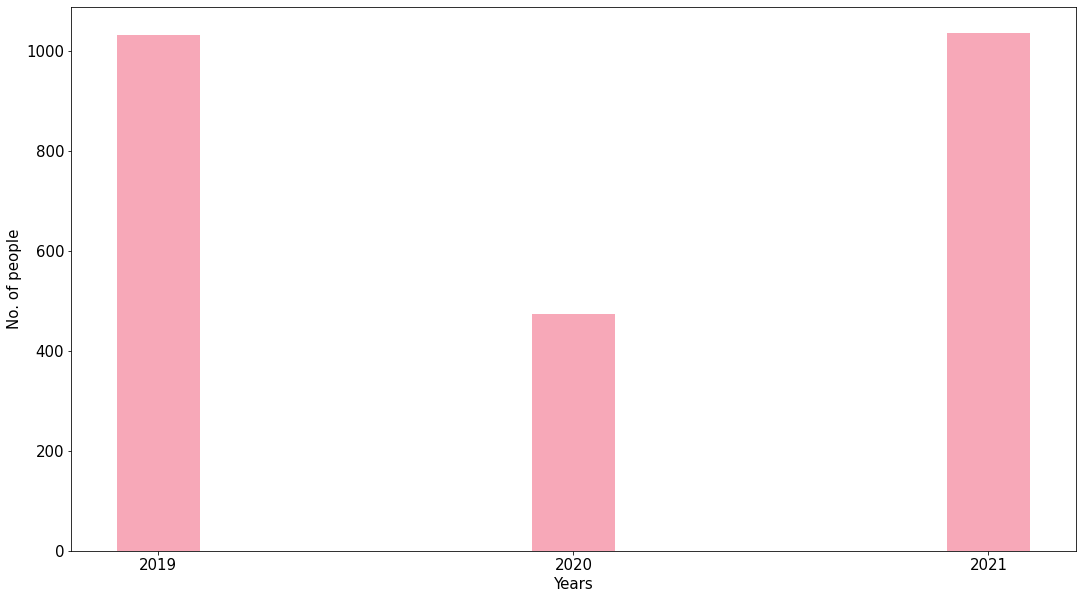

In [34]:
import matplotlib.pyplot as plt  
  
fig = plt.figure(figsize = (18, 10)) 
  
# creating the bar plot 
plt.bar(df_transpercent['yearData'], df_transpercent['Yes'], color ='#F7A8B8',  
        width = 0.2) 
plt.xticks(list(df_transpercent['yearData']),fontsize=15)  
plt.ylabel("No. of people",fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel("Years",fontsize=15) 
plt.show() 

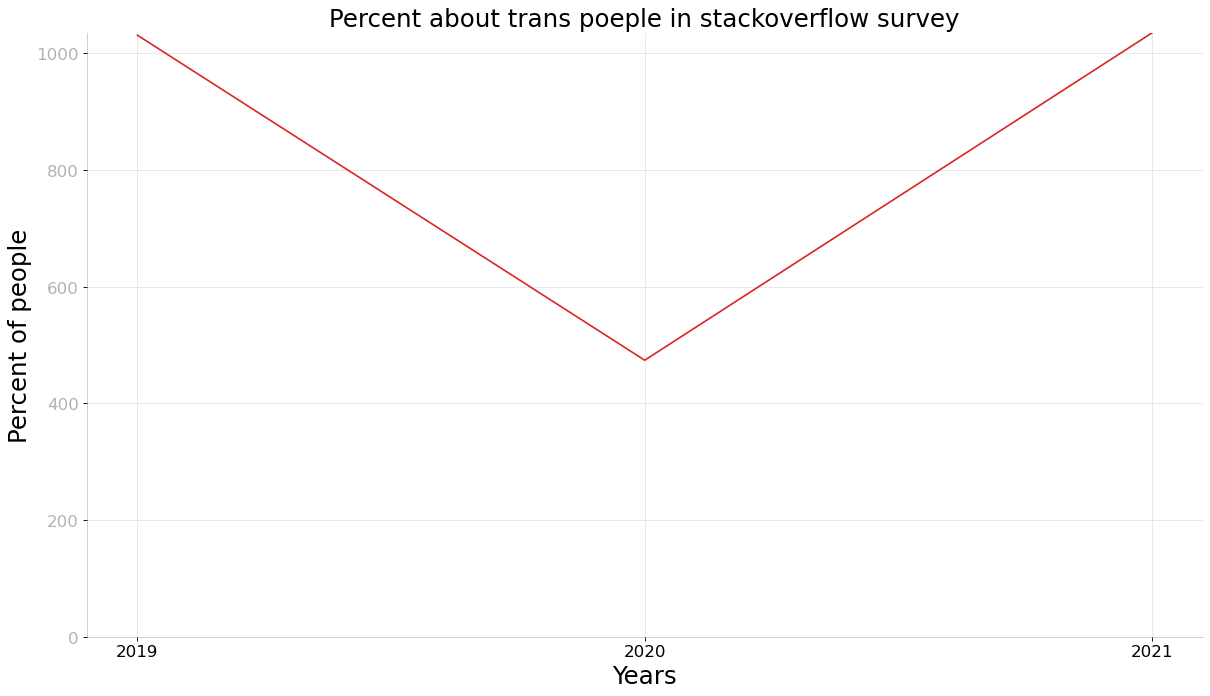

In [35]:
# Draw Plot
plt.figure(figsize=(18,10), dpi= 80)
plt.plot('yearData', 'Yes', data=df_transpercent, color='tab:red')

# Decoration
plt.ylim(0, df_transpercent['Yes'].max()+0.2)
xtick_location = df_transpercent['Yes'].tolist()
xtick_labels = [x[-3:] for x in df_transpercent.yearData.astype(str).tolist()]
plt.xticks(list(df_transpercent['yearData']),fontsize=15)
plt.yticks(fontsize=15, alpha=.3)
plt.title("Percent about trans poeple in stackoverflow survey", fontsize=22)
plt.grid(axis='both', alpha=.3)
plt.xlabel('Years',fontsize=22)
plt.ylabel('Percent of people',fontsize=22)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.2)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.2)   
plt.show()

### Question 2:  What are the top and bottom countries by number of trans people?

In [37]:
df_trans = df.groupby(['yearData','Trans','Country']).agg({'level_0': 'count'})
df_trans.to_csv('data_percent_per_year_country.csv')
df_trans

level_0
yearData Trans Country                                                    
2019     No    Afghanistan                                              22
               Albania                                                  78
               Algeria                                                 100
               Andorra                                                   4
               Angola                                                    4
...                                                                    ...
2021     Yes   United Arab Emirates                                      2
               United Kingdom of Great Britain and Northern Ir...       77
               United States                                           293
               Uruguay                                                   2
               Viet Nam                                                  9

[1241 rows x 1 columns]

In [41]:
df_transpercountry = df_trans.pivot_table('level_0', index='Country', columns='Trans', aggfunc='sum').reset_index()
df_transpercountry['Yes'].fillna(0.00, inplace=True)
df_transpercountry = df_transpercountry.sort_values('Yes', ascending=False)
df_trans.to_csv('data_percent_per_year_country.csv',index=False)
top_highest = df_transpercountry.head(10)
df_transpercountry = df_transpercountry.sort_values('Yes', ascending=True)
top_lowest = df_transpercountry.head(10)

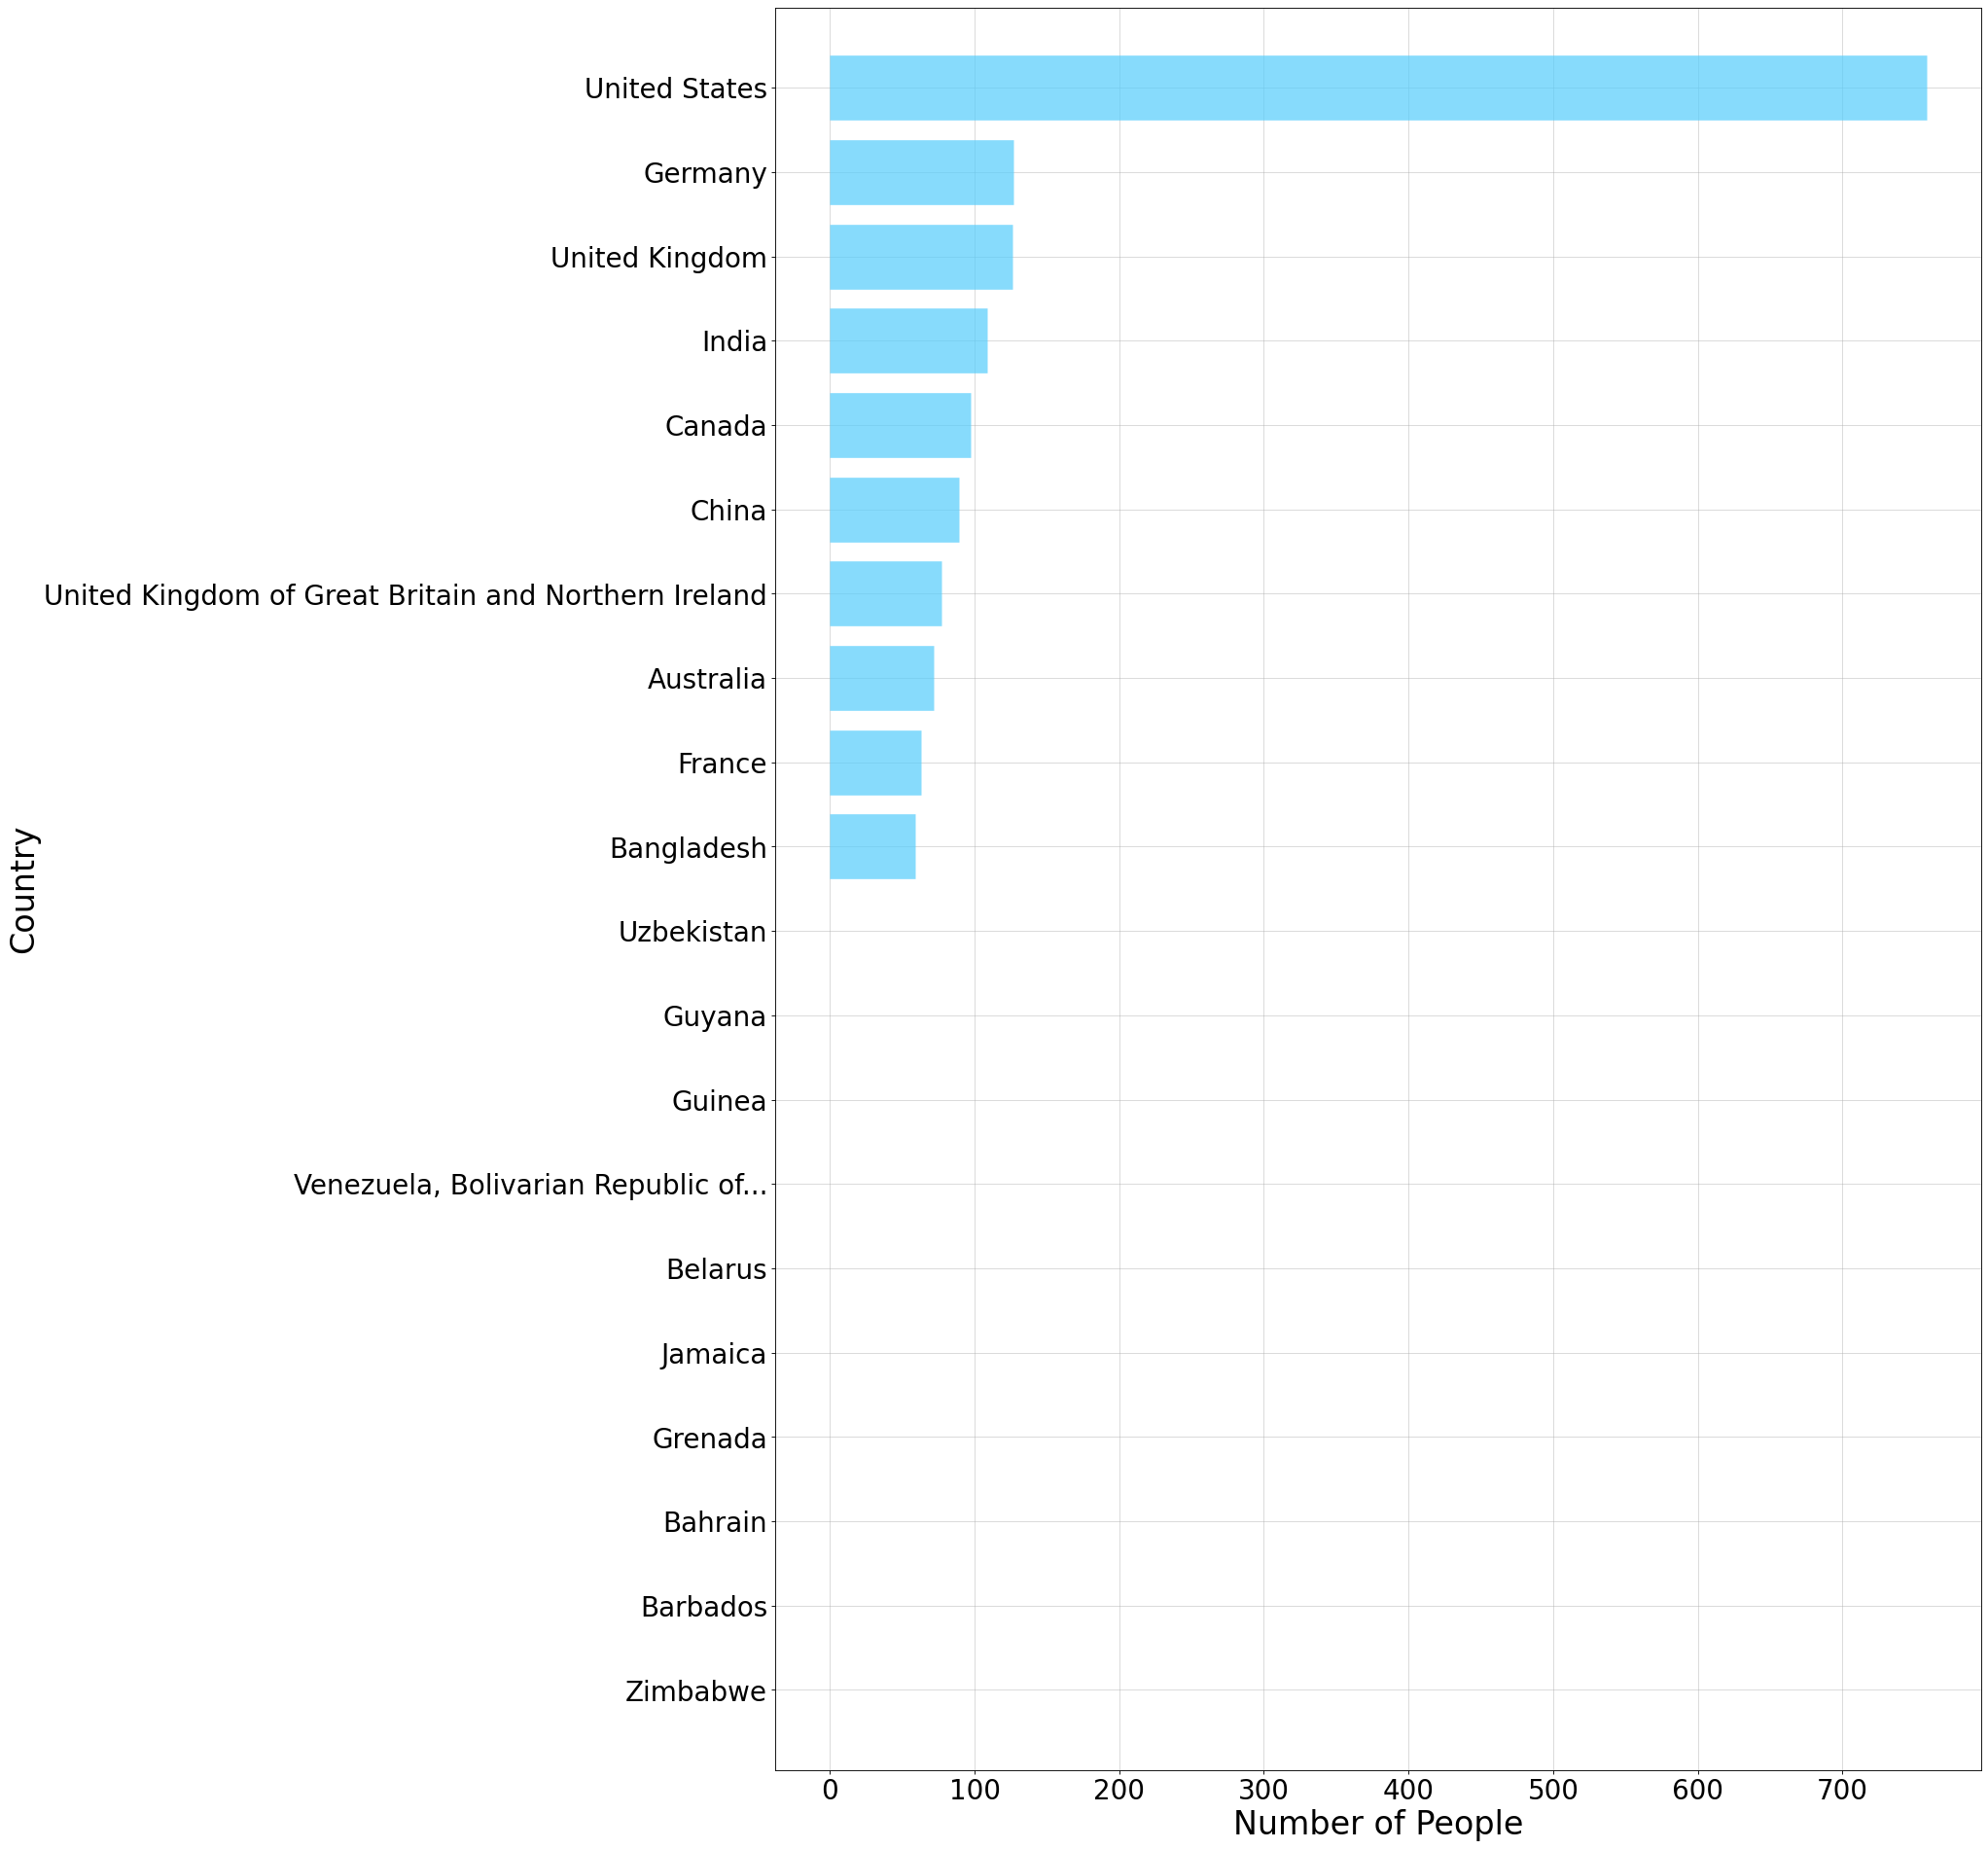

In [57]:
# Prepare Data
df2 = top_lowest.append(top_highest, sort=False);
x = df2.loc[:, ['Yes']]
df2['colors'] = ['#F7A8B8' if x < 0 else '#55CDFC' for x in df2['Yes']]
df2.sort_values('Yes', inplace=True)
df2.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(20,30), dpi= 80)
plt.hlines(y=df2.index, xmin=0, xmax=df2.Yes, color=df2.colors, alpha=0.7, linewidth=60)

# Decorations
plt.xlabel('Number of People',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.yticks(df2.index, df2.Country, fontsize=25)
plt.xticks(fontsize=25)
plt.grid(linestyle='-', alpha=0.5)
plt.show()

### Question 3: What is the current situation with programming skills by trans people?

In [51]:
df['MainBranch']

0                    I am a student who is learning to code
1                    I am a student who is learning to code
2         I am not primarily a developer, but I write co...
3                            I am a developer by profession
4                            I am a developer by profession
                                ...                        
236778                       I am a developer by profession
236779                       I am a developer by profession
236780                       I am a developer by profession
236781                       I am a developer by profession
236782                       I am a developer by profession
Name: MainBranch, Length: 236783, dtype: object

In [52]:
df_trans = df.groupby(['MainBranch','Trans']).agg({'level_0': 'count'})
df_trans

level_0
MainBranch                                         Trans                     
I am a developer by profession                     No                  152591
                                                   Prefer not to say    16952
                                                   Yes                   1482
I am a student who is learning to code             No                   25836
                                                   Prefer not to say     3885
                                                   Yes                    467
I am not primarily a developer, but I write cod... No                   17132
                                                   Prefer not to say     2285
                                                   Yes                    202
I code primarily as a hobby                        No                    8965
                                                   Prefer not to say     1354
                                                   Yes                    264
I used to be a developer by profession, but no ... No                    3378
                                                   Prefer not to say      553
                                                   Yes                     73
None of these                                      No                     820
                                                   Prefer not to say      492
                                                   Yes                     52

In [53]:
df_transpercountry = df_trans.pivot_table('level_0', index='MainBranch', columns='Trans', aggfunc='sum').reset_index()
df_transpercountry['Yes'].fillna(0.00, inplace=True)

In [54]:
df_transpercountry

Trans,MainBranch,No,Prefer not to say,Yes
0,I am a developer by profession,152591,16952,1482
1,I am a student who is learning to code,25836,3885,467
2,"I am not primarily a developer, but I write co...",17132,2285,202
3,I code primarily as a hobby,8965,1354,264
4,"I used to be a developer by profession, but no...",3378,553,73
5,None of these,820,492,52


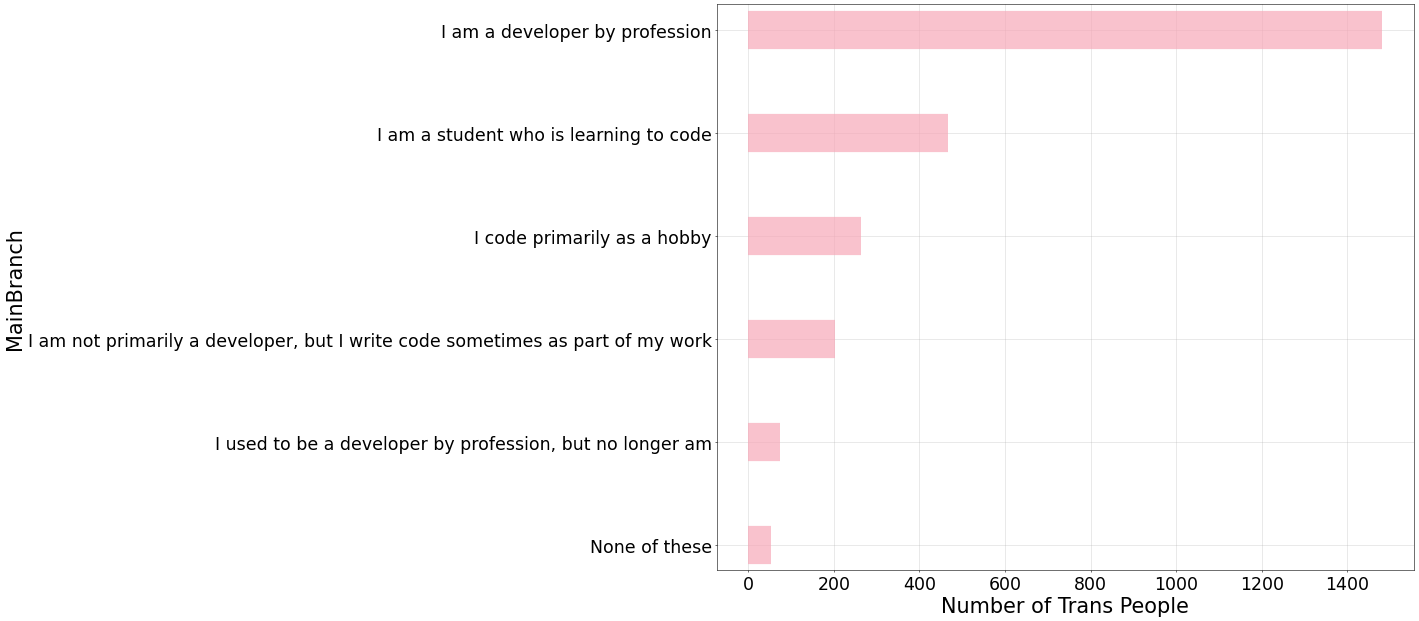

In [56]:
# Prepare Data
df2 = df_transpercountry
x = df2.loc[:, ['Yes']]
df2['colors'] = ['#F7A8B8' if x < 0 else '#F7A8B8' for x in df2['Yes']]
df2.sort_values('Yes', inplace=True)
df2.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(18,15), dpi= 50)
plt.hlines(y=df2.index, xmin=0, xmax=df2.Yes, color=df2.colors, alpha=0.7, linewidth=55)

# Decorations
plt.xlabel('Number of Trans People',fontsize=30)
plt.ylabel('MainBranch',fontsize=30)
plt.yticks(df2.index, df2.MainBranch, fontsize=25)
plt.xticks(fontsize=25)
plt.grid(linestyle='-', alpha=0.5)
plt.show()